#  CLUSTERING- CLASIFICACION DE ESTADOS (ENTIDAD) POR PELIGROSIDAD

## Librerias


In [1]:

# Librerias

# Data Set y EDA
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

# Feature Engineering
from scipy.stats import zscore

#Clustering
from  sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, single, cophenet
from scipy.spatial.distance import cdist,pdist, squareform


import warnings; warnings.filterwarnings('ignore')

## Dataset

In [2]:
df = pd.read_csv('delitos_sorted.csv')

In [3]:
df.sample(10)

,Unnamed: 0,Año,Clave_Ent,Entidad,Cve_Municipio,Municipio,Bien_jurídico_afectado,Tipo_de_delito,Subtipo_de_delito,Modalidad,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,total_year
32192,788745,2018,21,Puebla,21145,San Sebastián Tlacotepec,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,...,0,0,0,0,0,0,0,0,0,0
60970,1493763,2021,20,Oaxaca,20490,Santiago Texcalcingo,El patrimonio,Robo,Robo de autopartes,Con violencia,...,0,0,0,0,0,0,0,0,0,0
44332,1086176,2019,30,Veracruz de Ignacio de la Llave,30192,Vega de Alatorre,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,...,0,0,0,0,0,0,0,0,0,0
11771,288324,2017,24,San Luis Potosí,24009,Cerro de San Pedro,El patrimonio,Robo,Robo de autopartes,Sin violencia,...,0,0,0,0,0,0,0,0,0,0
59643,1461228,2021,20,Oaxaca,20158,San Jacinto Tlacotepec,El patrimonio,Robo,Robo de autopartes,Sin violencia,...,0,0,0,0,0,0,0,0,0,0
64068,1569707,2021,30,Veracruz de Ignacio de la Llave,30177,Tlacolulan,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,...,0,0,0,0,0,0,0,0,0,0
22547,552338,2015,16,Michoacán de Ocampo,16074,Cojumatlán de Régules,El patrimonio,Robo,Robo de autopartes,Sin violencia,...,0,0,0,0,0,0,0,0,0,0
20635,505494,2015,12,Guerrero,12012,Ayutla de los Libres,El patrimonio,Robo,Robo de autopartes,Sin violencia,...,0,0,0,0,0,0,0,0,0,0
14175,347222,2017,32,Zacatecas,32020,Jerez,El patrimonio,Robo,Robo de autopartes,Sin violencia,...,0,0,0,0,0,0,0,0,0,0
6797,166504,2017,14,Jalisco,14052,Juchitlán,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,...,0,0,0,0,0,0,0,0,0,2


## EDA - ANALISIS EXPLORATORIO DE DATOS

### Análisis Básico

In [4]:
# Tamaño del dataset
df.shape

(64876, 23)

In [5]:
#Información de campos del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64876 entries, 0 to 64875
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              64876 non-null  int64 
 1   Año                     64876 non-null  int64 
 2   Clave_Ent               64876 non-null  int64 
 3   Entidad                 64876 non-null  object
 4   Cve_Municipio           64876 non-null  int64 
 5   Municipio               64876 non-null  object
 6   Bien_jurídico_afectado  64876 non-null  object
 7   Tipo_de_delito          64876 non-null  object
 8   Subtipo_de_delito       64876 non-null  object
 9   Modalidad               64876 non-null  object
 10  Enero                   64876 non-null  int64 
 11  Febrero                 64876 non-null  int64 
 12  Marzo                   64876 non-null  int64 
 13  Abril                   64876 non-null  int64 
 14  Mayo                    64876 non-null  int64 
 15  Ju

In [6]:
# Datos básicos de estadística descriptiva
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,64876.0,794708.335162,458858.781721,1.0,397299.75,794726.5,1192113.25,1589413.0
Año,64876.0,2018.168074,1.951518,2015.0,2017.00,2018.0,2020.00,2021.0
Clave_Ent,64876.0,19.203095,7.589202,1.0,14.00,20.0,25.00,32.0
Cve_Municipio,64876.0,19303.128615,7605.000023,1001.0,14044.00,20210.0,25011.00,32058.0
Enero,64876.0,1.527206,14.043231,0.0,0.00,0.0,0.00,943.0
Febrero,64876.0,1.421157,12.995725,0.0,0.00,0.0,0.00,883.0
Marzo,64876.0,1.515414,13.698412,0.0,0.00,0.0,0.00,908.0
Abril,64876.0,1.380865,12.698194,0.0,0.00,0.0,0.00,932.0
Mayo,64876.0,1.445157,13.418357,-1.0,0.00,0.0,0.00,983.0
Junio,64876.0,1.431084,12.876541,0.0,0.00,0.0,0.00,718.0


In [7]:
# conteo del numero de registros donde el total es cerd
df[df==0].count() / df.count()

Unnamed: 0                0.000000
Año                       0.000000
Clave_Ent                 0.000000
Entidad                   0.000000
Cve_Municipio             0.000000
Municipio                 0.000000
Bien_jurídico_afectado    0.000000
Tipo_de_delito            0.000000
Subtipo_de_delito         0.000000
Modalidad                 0.000000
Enero                     0.867516
Febrero                   0.869197
Marzo                     0.866360
Abril                     0.870137
Mayo                      0.866638
Junio                     0.866885
Julio                     0.865821
Agosto                    0.865682
Septiembre                0.864958
Octubre                   0.865112
Noviembre                 0.864526
Diciembre                 0.866145
total_year                0.681531
dtype: float64

In [8]:
# Datos únicos
df.nunique()

Unnamed: 0                64876
Año                           7
Clave_Ent                    32
Entidad                      32
Cve_Municipio              2478
Municipio                  2331
Bien_jurídico_afectado        1
Tipo_de_delito                1
Subtipo_de_delito             2
Modalidad                     4
Enero                       215
Febrero                     201
Marzo                       212
Abril                       196
Mayo                        203
Junio                       202
Julio                       206
Agosto                      211
Septiembre                  203
Octubre                     206
Noviembre                   208
Diciembre                   208
total_year                  869
dtype: int64

In [9]:
#Valores Faltantes
df.isnull().sum().sum()

0

In [10]:
#Valores duplicados
df[df.duplicated()]

,Unnamed: 0,Año,Clave_Ent,Entidad,Cve_Municipio,Municipio,Bien_jurídico_afectado,Tipo_de_delito,Subtipo_de_delito,Modalidad,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,total_year


#### Observaciones

* Los campos de Entidad, Municipio, Bien_jurídico_afectado, Tipo_de_delito, Subtipo_de_delito, Modalidad están como tipo object.  Ya que este dataset ya es un subconjunto de datos relacionado con delitos relacionados a vehículos, y que el objetivo esta relacionado con evaluar el número de delitos y no el tipo, solo para la variable "Entidad", no se hace necesario hacer un paso a datos numéricos, contemplando que la "Entidad" esta relacionada directamente con el campo Clave_Ent que es de tipo "int", por tanto podemos realizar el modelo sin problemas.
* Se debe de eliminar el campo Unnamed: 0, qyue no tiene información de valor para el dataset
* La cantidad de datos en cada campo es consistente, por lo cual no hay datos faltantes
* Se ve un valor atípico en el valor mínimo del mes de mayo con un -1, se debe realizar análisis de este caso para generar una imputación
* El porcentaje de ceros es bastante alto, pero no es un problema para el modelo, debido a los específico de la clasificación de los datos en cada registro
* El número de datos únicos de cada variable es consistente con el dataset
* Se confirma que no hay valores faltantes, ni duplicados

### Análisis de correlación y Bivariado

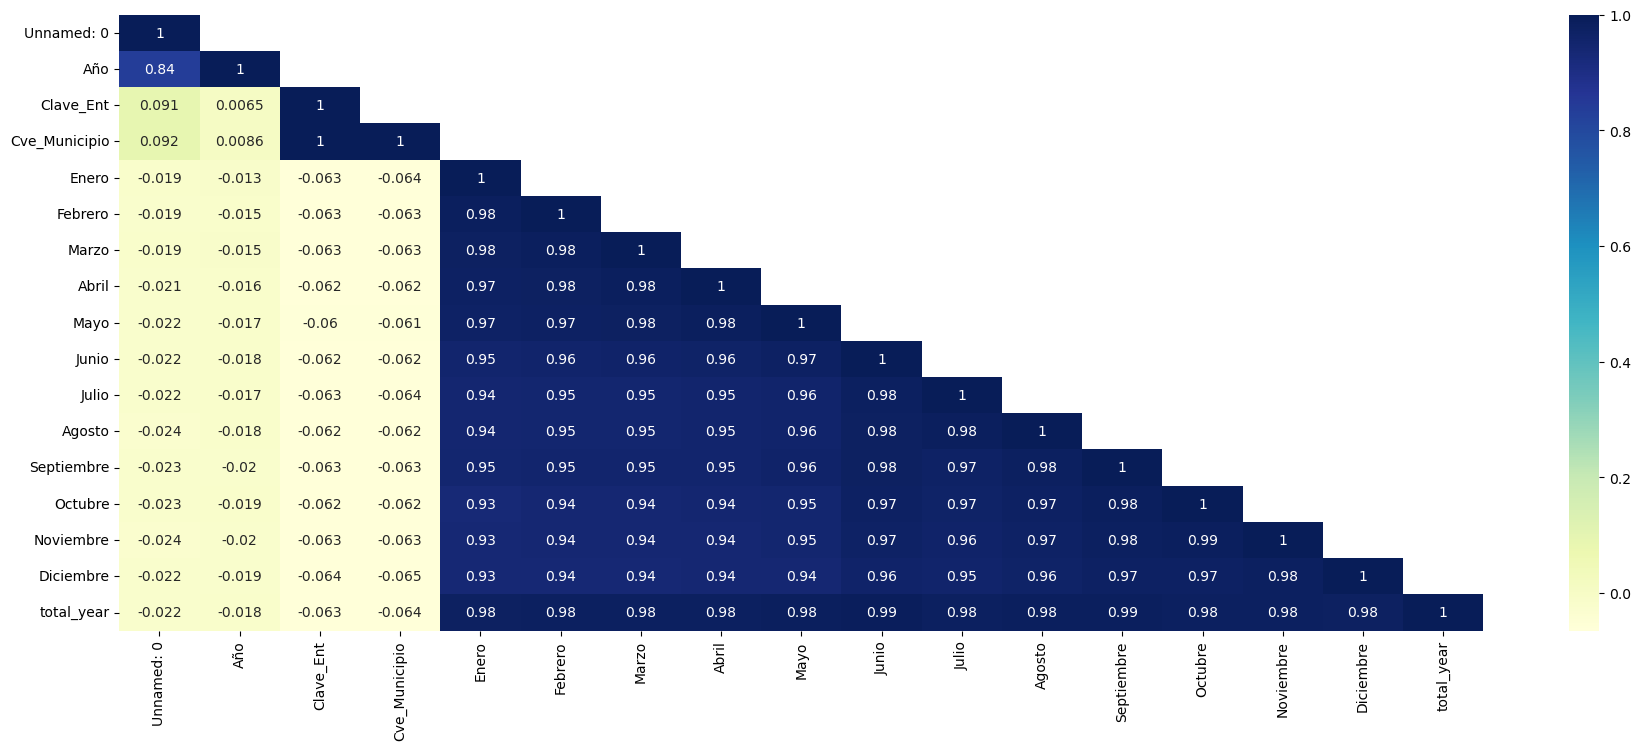

In [11]:
# Gráfica de correlación
plt.figure(figsize=(22,8))
corr_df = df.select_dtypes(include=[np.number]).corr(method='pearson')

df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap=sns.heatmap(df_lt, cmap="YlGnBu", annot=True)

IndexError: index 4 is out of bounds for axis 0 with size 4

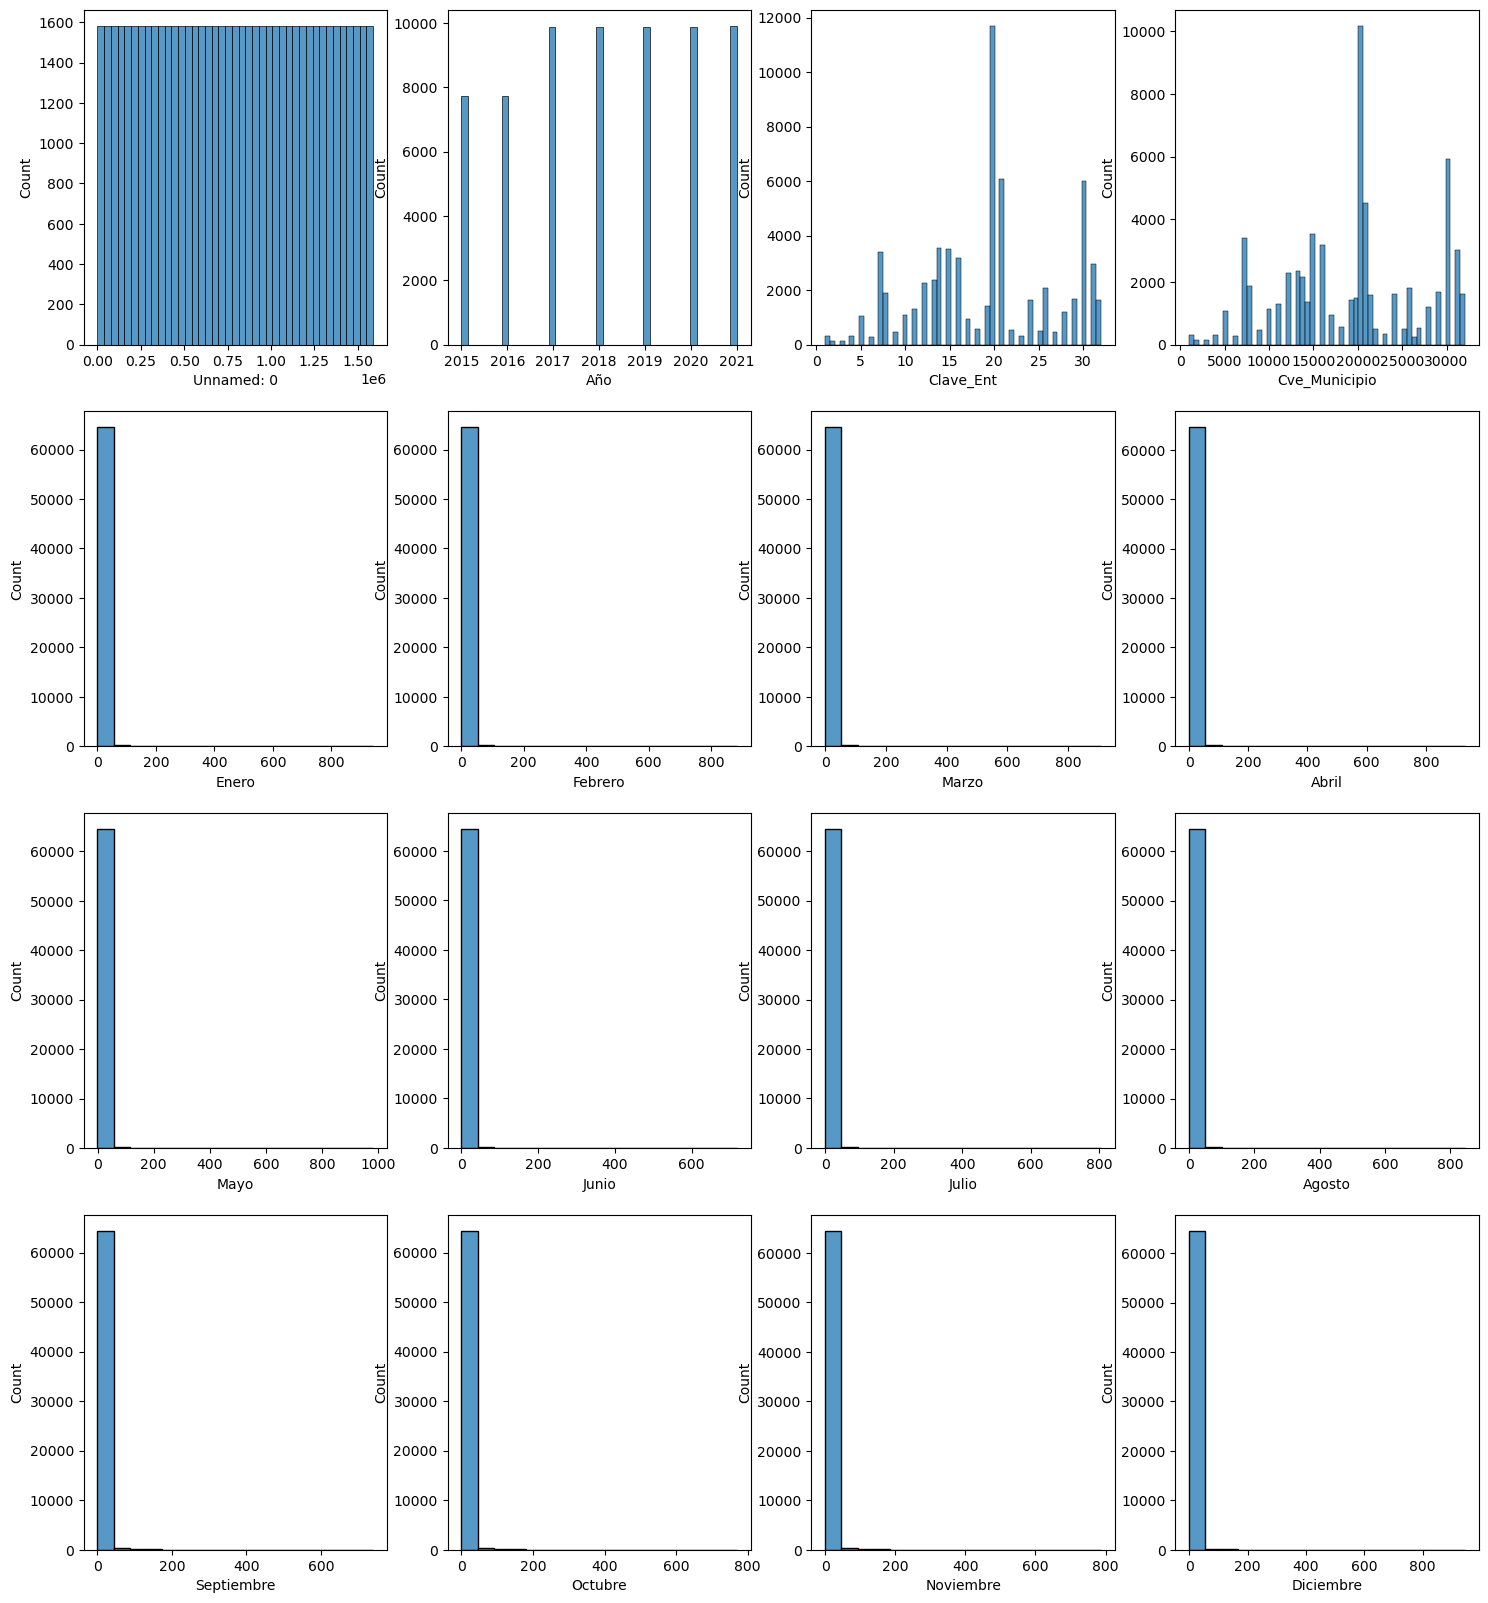

In [22]:
#Gráfico exploratorio de columnas

#definicion de columnas numericas
df_numeric = df.select_dtypes(include=['number']) 

#definición del gráfico
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18,20))
for i, column in enumerate(df_numeric):
    sns.histplot(df[column], ax=axes[i//4, i%4], kde=False)

Text(0.5, 1.0, 'Box-Plot de variables')

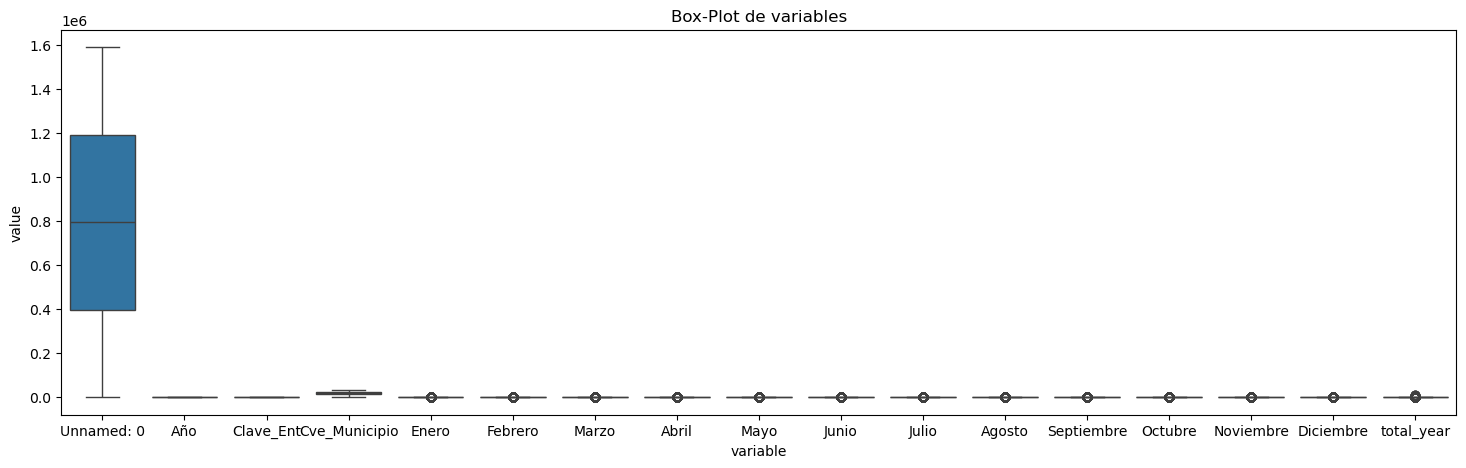

In [24]:
# Busca rangos de variables y potenciales outliers
plt.figure(figsize=(18,5))
sns.boxplot(x="variable", y="value", data=pd.melt(df_numeric)).set_title('Box-Plot de variables')

#### Observaciones

* En el gráfico de correlación hay una muy alta correlación en los datos de los meses y total_year, pero es totalmente normal, ya que se trata de un conteo, por lo que no se considera eliminar ninguna de las columnas, ya que son importantes para el análsis de clustering.
* Los histogramas por columnas, siguen siendo bastante estables en la información, se destacan las variables de municipios y entidades con variaciones importantes, lo que es muy bueno para el modelo, respecto al objetivo que se está buscando.
* No se visualizan outliers en el conjunto de datos, lo que sigue confirmando que se tiene un muy buen dataset para el desarrollo del modelo.

## Feature Engineering

In [25]:
# Copia del Dataframe
df2 = df_numeric.copy()
df2.sample(5)

,Unnamed: 0,Año,Clave_Ent,Cve_Municipio,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,total_year
22670,555375,2015,16,16105,0,0,0,0,0,0,0,0,0,0,0,0,0
63123,1546488,2021,28,28043,0,0,0,0,0,0,0,0,0,0,0,0,0
59138,1448879,2021,20,20032,0,0,0,0,0,0,0,0,0,0,0,0,0
4421,108292,2016,32,32048,1,1,1,6,0,2,1,0,0,2,1,1,16
32634,799531,2018,24,24008,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
# Eliminar columna Unnamed: 0
df2.drop("Unnamed: 0", axis=1, inplace=True)

In [27]:
df2.head(3)

,Año,Clave_Ent,Cve_Municipio,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,total_year
0,2016,16,16033,2,0,3,2,2,8,3,5,0,4,2,6,37
1,2016,16,16033,2,0,1,2,0,0,3,0,0,0,0,1,9
2,2016,16,16033,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#  Valor atípico en Mayo

#Valores únicos en Mayo
df2['Mayo'].unique()

array([  2,   0,   1,  11,  10,  42, 158,   4,  12,   3,   9,  18,  46,
        23,   6,  27,  44,  75,  85,  17,  19,   5,   7,   8,  33,  53,
        14,  35,  22, 128,  13,  20,  26,  15, 223,  32,  60,  71,  38,
        16,  24,  55, 167,  36, 120,  25,  47,  66,  39,  69,  65,  31,
        21,  34,  40,  43, 200, 111, 209, 385,  72, 983,  61,  59,  51,
        64,  80, 135,  45,  57,  82, 104,  30,  37,  28, 149,  29,  50,
        92,  93, 193, 462, 106,  89, 101, 119, 274,  58,  56,  54, 434,
       129,  41, 137,  98, 322, 160, 204, 150,  67,  48, 273,  70, 297,
       232, 208, 155,  81, 189, 122, 196, 248, 680,  52, 251,  74, 103,
        84,  90, 102, 182, 134,  63, 284, 451,  96, 118, 231,  73,  77,
       715, 203,  49, 179,  62, 336, 125,  83,  86,  76, 117, 138, 400,
       488, 126,  79, 100,  68, 124, 140,  97, 619, 177, 141,  94, 121,
       139, 185, 174, 112, 113, 178, 123, 460, 545, 105, 187,  78, 626,
       157, 114, 115, 148, 153, 110, 271, 262,  88, 159,  -1, 54

In [ ]:
# Ver los registros que contenga un -1
df2[df2['Mayo'] == -1]

,Año,Clave_Ent,Cve_Municipio,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,total_year
33245,2018,27,27011,0,0,0,0,-1,0,0,0,3,1,1,0,4


In [31]:
# Imputacion del valor -1 en un registro por el valor de 0
# No se eliminia el registro porque tiene datos de conteo de delitos en otros meses
# Se imputa con 0 ya que es un conteo que no puede tener valores negativos, y su valor mas cercano es 0. Nos se hace un mean o media, porque son valores elevados que
# pueden no ser congruentes con un registro en un municipio determinado
df2['Mayo'] = df2['Mayo'].replace(-1, 0)
print(df2['Mayo'].unique())  # Debería mostrar valores distintos a -1


[  2   0   1  11  10  42 158   4  12   3   9  18  46  23   6  27  44  75
  85  17  19   5   7   8  33  53  14  35  22 128  13  20  26  15 223  32
  60  71  38  16  24  55 167  36 120  25  47  66  39  69  65  31  21  34
  40  43 200 111 209 385  72 983  61  59  51  64  80 135  45  57  82 104
  30  37  28 149  29  50  92  93 193 462 106  89 101 119 274  58  56  54
 434 129  41 137  98 322 160 204 150  67  48 273  70 297 232 208 155  81
 189 122 196 248 680  52 251  74 103  84  90 102 182 134  63 284 451  96
 118 231  73  77 715 203  49 179  62 336 125  83  86  76 117 138 400 488
 126  79 100  68 124 140  97 619 177 141  94 121 139 185 174 112 113 178
 123 460 545 105 187  78 626 157 114 115 148 153 110 271 262  88 159 540
 162 256 402  87 127 235 116 176 143 131  91 172 506 154 107 163 454 144
 170 240 415 132]


### Observaciones

* No se hace un escalamiento de datos, ya que no todos son medidas, y se tienen datos de año, y codigos de municipio y estado junto con conteos de delitos.

## Modelo de Clustering K-Means

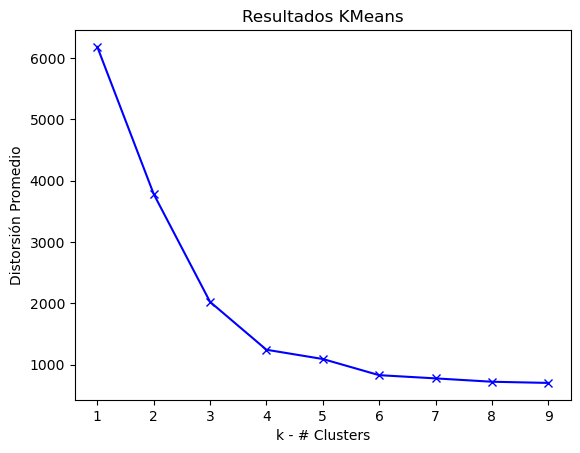

In [32]:
# 1. Se busca un numero de clusters optimo

clusters = range(1,10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(df2)
    prediction = model.predict(df2)
    #Generates the average distortions calculation for each one of the clusters points
    # Compares each data point with the clusters centers and obtains the minimum and divides it for mydata
    meanDistortions.append(sum(np.min(cdist(df2, model.cluster_centers_, "euclidean"), axis=1)) / df2.shape[0])

# Plots the screen graphic
# Distorion decreseas as the number of clusters increase, until the number of clusters = number of points
plt.plot(clusters,meanDistortions, 'bx-')
plt.xlabel("k - # Clusters")
plt.ylabel('Distorsión Promedio')
plt.title("Resultados KMeans")
plt.show()

#### Observaciones

* El elbow se visualiza en el 4 por lo que este será el número de Clusters a utilizar.

In [33]:
# Se genera el número de clusters = 4
# El parametro n_initi significa que se probaran con ese número de diferentes inicializaciones y se tomarán las mejores.


kmeans = KMeans(n_clusters=4, n_init = 15, random_state=1)
kmeans.fit(df2)

KMeans(n_clusters=4, n_init=15, random_state=1)

In [34]:
#Se mapean los centroides con la lista de elementos y se crea un dataframe para los labels de los clusters
centroids = kmeans.cluster_centers_
df_centroids = pd.DataFrame(centroids, columns= list(df2))
df_centroids

,Año,Clave_Ent,Cve_Municipio,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,total_year
0,2018.018494,6.958168,6996.974461,2.969177,2.720828,2.889916,2.633311,2.667657,2.629568,2.737340,2.761559,2.670850,2.834654,2.767063,2.851277,33.133201
1,2018.470536,20.639050,20821.209850,0.616843,0.567018,0.609499,0.568734,0.586631,0.592964,0.620756,0.633861,0.583509,0.622559,0.614556,0.620800,7.237731
2,2018.000000,29.526224,29595.298951,0.733204,0.687188,0.733142,0.664023,0.695430,0.685252,0.671516,0.678384,0.700175,0.737450,0.686563,0.644605,8.316871
3,2018.002113,14.110589,14162.751585,2.719946,2.558288,2.727166,2.471003,2.644165,2.611939,2.709380,2.723703,2.659016,2.782226,2.692533,2.527471,31.826837


In [36]:
#Se convierten los labels en categorias y asi cada registro tiene un cluster asociado.
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['labels']))
df_labels['labels'] = df_labels['labels'].astype("category")
df_labels

,labels
0,3
1,3
2,3
3,3
4,3
...,...
64871,2
64872,2
64873,2
64874,2


In [37]:
# Se hace la union del dataframe de las etiquetas con el de datos

df_labeled = df2.join(df_labels)

In [38]:
df_labeled.columns

Index(['Año', 'Clave_Ent', 'Cve_Municipio', 'Enero', 'Febrero', 'Marzo',
       'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre',
       'Noviembre', 'Diciembre', 'total_year', 'labels'],
      dtype='object')

In [39]:
# df_labeled tiene las variables utilizadas en el proceso de clustering
df_labeled.sample(20)

,Año,Clave_Ent,Cve_Municipio,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,total_year,labels
35305,2019,4,4007,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44474,2019,31,31013,0,0,0,0,0,0,0,0,0,0,0,0,0,2
31255,2018,20,20481,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13572,2017,30,30190,0,0,0,0,0,0,0,0,0,0,0,0,0,2
5826,2017,11,11020,0,0,0,0,0,0,0,0,0,0,0,0,0,3
22416,2015,16,16042,0,0,0,1,0,0,0,0,1,1,0,0,3,3
54619,2020,31,31078,0,0,0,0,0,0,0,0,0,0,0,0,0,2
22691,2015,16,16110,0,0,0,0,0,0,0,0,0,0,0,0,0,3
35488,2019,6,6004,0,0,0,0,0,0,0,0,0,0,0,0,0,0
56728,2021,12,12066,1,1,2,1,1,1,2,2,0,1,0,3,15,3


In [40]:
#Division de los clusters
# Número de registros en cada cluster
df_labeled['labels'].value_counts()

labels
1    22740
3    17036
2    16016
0     9084
Name: count, dtype: int64

Text(0.5, 1.0, 'KMeans')

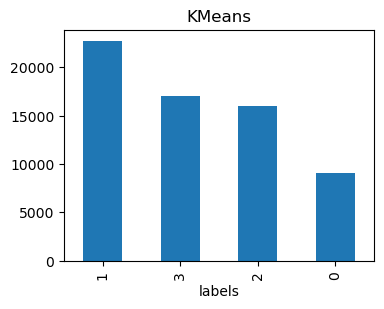

In [41]:
#Gráfico de clusters por registro
fig, ax= plt.subplots(1,1,figsize=(4,3))
pd.value_counts(df_labeled['labels']).plot(kind='bar').set_title("KMeans")

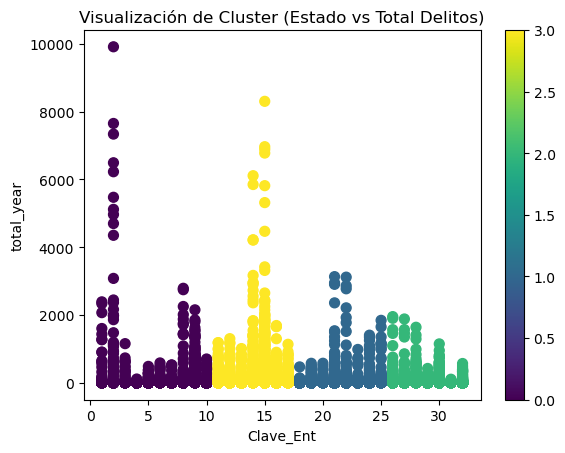

In [43]:
# Grafico de clusters
# Se escogen variables que tengan mucha diferencia entre los mismos
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df_labeled['Clave_Ent'],df_labeled['total_year'], c=df_labeled['labels'], s=50)
ax.set_title("Visualización de Cluster (Estado vs Total Delitos)")
ax.set_xlabel("Clave_Ent")
ax.set_ylabel("total_year")
plt.colorbar(scatter)
plt.show()

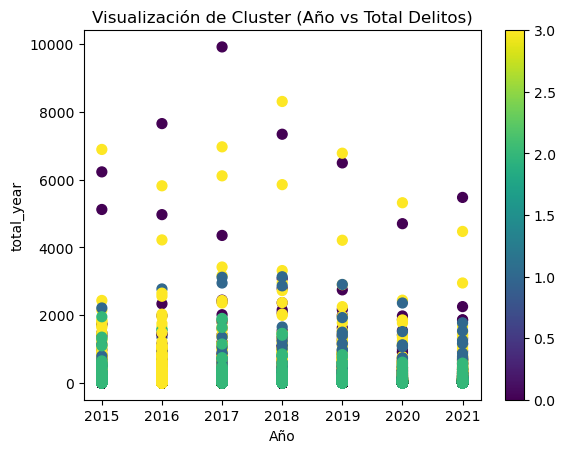

In [44]:
# Grafico de clusters
# Se escogen variables que tengan mucha diferencia entre los mismos
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df_labeled['Año'],df_labeled['total_year'], c=df_labeled['labels'], s=50)
ax.set_title("Visualización de Cluster (Año vs Total Delitos)")
ax.set_xlabel("Año")
ax.set_ylabel("total_year")
plt.colorbar(scatter)
plt.show()

## Generación de datos por Cluster

In [59]:
#Creación un dataframe para hacer un catalogo de Entidades con la clave y el nombre
df_entidades = df[['Clave_Ent', 'Entidad']].drop_duplicates()

In [54]:
df_entidades

,Clave_Ent,Entidad
0,16,Michoacán de Ocampo
324,17,Morelos
456,18,Nayarit
536,19,Nuevo León
740,20,Oaxaca
884,21,Puebla
1752,22,Querétaro
1828,23,Quintana Roo
1872,24,San Luis Potosí
2104,25,Sinaloa


In [60]:
# Creacion de nuevo dataset uniendo el resultado de la tabla con clusters y el nombre de la entidad
df3 = df_labeled.merge(df_entidades, on='Clave_Ent', how='left')
df3.sample(15)


,Año,Clave_Ent,Cve_Municipio,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,total_year,labels,Entidad
55203,2021,5,5025,2,1,0,0,0,0,0,0,1,1,0,0,5,0,Coahuila de Zaragoza
63514,2021,30,30038,0,0,0,0,0,0,0,0,0,0,0,0,0,2,Veracruz de Ignacio de la Llave
57036,2021,13,13062,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Hidalgo
30710,2018,20,20345,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Oaxaca
7357,2017,15,15066,0,0,0,0,0,0,0,0,0,0,0,0,0,3,México
47819,2020,15,15022,0,0,0,0,0,0,0,0,0,0,0,0,0,3,México
6843,2017,14,14063,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Jalisco
47087,2020,13,13049,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Hidalgo
8308,2017,19,19013,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Nuevo León
45818,2020,7,7106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chiapas


In [67]:
#Definicion de un dataset para los estados del cluster 0
df_resultado0 = (
    df3[df3['labels'] == 0]  # Filtrar registros donde labels == 0
    .groupby(['Clave_Ent'], as_index=False)  # Agrupar por Clave_Ent
    .agg({'total_year': 'sum'})  # Sumar total_year
)

# Agregar el nombre de la entidad
df_resultado0 = df_resultado0.merge(df_entidades[['Clave_Ent', 'Entidad']], on='Clave_Ent', how='left')

# Agregar la columna "labels" con valor fijo 0
df_resultado0['labels'] = 0

# Ordenar por total_year en orden descendente
df_resultado0 = df_resultado0.sort_values(by='total_year', ascending=False)

# Mostrar los datos
df_resultado0


,Clave_Ent,total_year,Entidad,labels
8,9,111587,Ciudad de México,0
1,2,100316,Baja California,0
7,8,30733,Chihuahua,0
0,1,20022,Aguascalientes,0
6,7,8963,Chiapas,0
9,10,7501,Durango,0
4,5,7424,Coahuila de Zaragoza,0
2,3,7409,Baja California Sur,0
5,6,6095,Colima,0
3,4,932,Campeche,0


In [69]:
#Definicion de un dataset para los estados del cluster 1
df_resultado1 = (
    df3[df3['labels'] == 1]  # Filtrar registros donde labels == 0
    .groupby(['Clave_Ent'], as_index=False)  # Agrupar por Clave_Ent
    .agg({'total_year': 'sum'})  # Sumar total_year
)

# Agregar el nombre de la entidad
df_resultado1 = df_resultado1.merge(df_entidades[['Clave_Ent', 'Entidad']], on='Clave_Ent', how='left')

# Agregar la columna "labels" con valor fijo 0
df_resultado1['labels'] = 1

# Ordenar por total_year en orden descendente
df_resultado1 = df_resultado1.sort_values(by='total_year', ascending=False)

# Mostrar los datos
df_resultado1

,Clave_Ent,total_year,Entidad,labels
3,21,59381,Puebla,1
4,22,32980,Querétaro,1
7,25,21871,Sinaloa,1
6,24,16359,San Luis Potosí,1
1,19,14224,Nuevo León,1
2,20,9819,Oaxaca,1
5,23,7660,Quintana Roo,1
0,18,2292,Nayarit,1
